# Applying machine learning techniques to predict the properties of energetic materials

Daniel C. Elton , Zois Boukouvalas, Mark S. Butrico, Mark D. Fuge & Peter W. Chung

# Highlights

Material research and development takes a very long time due to the slow and meticulous calculations it requires before and after it goes into production. A material can easily take nearly 15-50 years depending on how quickly the calculations can be performed. A lot of these calculations are dependent on the density functional theory (DFT) for us to ascertain the physical and chemical properties of these materials. However numerous advancements have been made using Machine Learning (ML) which can not only reduce these immense calculation times but also predict with a very high accuracy. 

The biggest requirement of Machine Learning is the size of the training data. There have been a lot of studies conducted where they showed with the appropriate amount of data we can achieve good results. However as aforementioned material data is very difficult to compute and there do not exist many repositories of data. For this reason this paper tries to achieve the same level of performance with lesser data and still show significant results. 

The paper uses 109 molecular structures for 10 compounds as input to try to predict various features while training with the remaining features. The molecular featurization methods include - sum over bonds, custom descriptors, Coulomb matrices, Bag of Bonds, and fingerprints etc. In addition to the 109 molecular compounds 300 more compounds are added to training to demonstrate that the accuracy can be further reduced by including more traning data. 

# Data Description

Majority of the data used is obtained from the Huang Massa paper. The dataset contains molecular properties with important features like density, explosive energy etc. 

# Algorithm

**Kernel Ridge Regression**

   KRR(x,y):
   
   step 1$\rightarrow$ Initilaize an RBF kernel called $k(x,x')$ Here $x$ and $x'$ are different structures checked for similarity.
   
   step 2$\rightarrow$ Assign a prediction function $E(x) = \sum_{i=1}^{N} \alpha k(x,x')$. Here the idea is that $E \approx y_i$ where $y_i$ is the target value.  

step 3$\rightarrow$ The $\alpha$ can be learnt through optimization by minimizing the objective function $\min_{\alpha} \sum_{i=1}^{N} [E(x) - y_i]^2 + \lambda \sum_{i=1}^{N} \alpha_{i}^{2}$ 

step 4$\rightarrow$ Using the training samples learn $\alpha$ in step 3 and use step 2 to predict the values for test set and compare. 


In [5]:
from mmltoolkit.fingerprints import * 
import pandas as pd
from rdkit import Chem
from sklearn.linear_model import Ridge, LinearRegression, Lasso, BayesianRidge
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
from mmltoolkit.CV_tools import * 
from sklearn.model_selection import KFold, ShuffleSplit
import warnings


In [6]:
data_smile = pd.read_excel('data/Huang_Massa_data_with_all_SMILES.xlsx', skipfooter=1)
data_smile

,num,Molecular Name,Formula,Density (g/cm3),Delta Hf solid (kj/mol),Explosive energy (kj/cc),Shock velocity (km/s),Particle velocity (km/s),Speed of sound (km/s),Pressure (Gpa),T(K),TNT Equiv (per cc),group,SMILES,NOTE
0,1,CUGCOW,C8N7O14H1,2.024,641.16,6.419,9.569,2.519,7.050,48.777,5440,2.233,Cubane,O=N(=O)C12C3C4(N(=O)=O)C1(N(=O)=O)C1(N(=O)=O)C...,NaN
1,2,PUBMUU02,C6N12O12H6,2.044,430.83,5.623,9.972,2.346,7.626,47.807,3886,1.828,CL20,O=N(=O)N1C2C3N(N(=O)=O)C4C1N(N(=O)=O)C(C(N2N(=...,NaN
2,3,KURT08MO,C4N8O10H4F4,2.028,-151.80,5.290,8.365,2.286,6.079,38.780,4342,1.842,Linear,[H]C([H])(N(N(=O)=O)C([H])([H])C(N(F)F)(N(=O)=...,NaN
3,4,ELUDEV,C4N10O6H2,1.996,657.13,5.228,9.729,2.289,7.441,44.490,3950,1.698,Pyrazole,O=N(=O)NC1=NON=C1N=NC1=NON=C1NN(=O)=O,NaN
4,5,UGUGUY,C8N6O12H2,1.931,593.87,5.188,9.061,2.318,6.743,40.555,5184,1.920,Cubane,O=N(=O)C12C3C4(C1C1(N(=O)=O)C2(N(=O)=O)C3(N(=O...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,102,ZZZMUC,C7N3O6H5,1.654,-63.54,2.359,7.179,1.689,5.491,20.053,3244,1.000,TNT,Cc1c(cc(cc1N(=O)=O)N(=O)=O)N(=O)=O,TNT - with isolated molecule refcode
105,64,CHATC3N,C4N4O7H4,1.952,-435.58,3.829,8.650,1.981,6.669,33.443,2809,1.226,Butterfly,[H]C2([H])N(N(=O)=O)C1([H])OC(=O)OC1([H])N2N(=...,"Note: this one is cut off at the bottom, but f..."
106,68,SRIP25,CN6OH4,1.725,325.49,3.768,9.384,2.090,7.294,33.831,2684,1.261,Pyrazole,[H]ON([H])n1cnc(N([H])[H])n1,Note the discrepancy between the chemical form...
107,93,CLCPI,C7N8O10H10,1.756,-174.72,3.229,8.074,1.918,6.156,27.188,3150,1.226,Butterfly,[H]C([H])([H])[O]COC2C(N(=O)=O)C1C(N(N(=O)=O)C...,"""Me"" is short for a methyl - a carbon with 3 ..."


In [7]:
data_smile['Mols'] = data_smile['SMILES'].apply(Chem.MolFromSmiles)

In [8]:
y = data_smile['Explosive energy (kj/cc)'].values
y

array([6.419, 5.623, 5.29 , 5.228, 5.188, 5.141, 5.138, 5.005, 4.995,
       4.987, 4.979, 4.941, 4.882, 4.846, 4.837, 4.825, 4.801, 4.769,
       4.747, 4.73 , 4.709, 4.708, 4.7  , 4.687, 4.593, 4.576, 4.567,
       4.548, 4.48 , 4.456, 4.452, 4.43 , 4.378, 4.362, 4.343, 4.332,
       4.312, 4.301, 4.267, 4.26 , 4.251, 4.243, 4.231, 4.209, 4.209,
       4.202, 4.196, 4.189, 4.185, 4.167, 4.133, 4.122, 4.063, 4.046,
       3.992, 3.96 , 3.926, 3.898, 3.874, 3.87 , 3.858, 3.857, 3.853,
       3.798, 3.774, 3.767, 3.73 , 3.729, 3.722, 3.711, 3.71 , 3.706,
       3.672, 3.66 , 3.656, 3.652, 3.647, 3.639, 3.535, 3.518, 3.49 ,
       3.479, 3.415, 3.356, 3.345, 3.282, 3.18 , 3.124, 3.017, 2.809,
       2.767, 2.643, 2.494, 2.151, 1.817, 1.654, 1.64 , 1.518, 0.954,
       0.95 , 3.768, 3.477, 3.308, 3.057, 2.359, 3.829, 3.768, 3.229,
       3.629])

In [9]:
fp_list = make_fingerprints(list(data_smile['Mols']), length = 200)

test_fingerprints(fp_list, Lasso(alpha=1e-3, max_iter=10000), y, verbose=False)

\begin{tabular}{c c}
           name        &  avg abs error in CV (kJ/cc) \\
\hline
 E-state (fixed length) (1995) & 0.498 \\
                 Avalon (2006) & 0.872 \\
 ECFPs/Morgan Circular (2010)  & 0.954 \\
    Topological Torsion (1987) & 1.034 \\
              Atom pair (1985) & 1.051 \\
      RDKit topological (2006) & 1.072 \\
\end{tabular}


In [6]:
mols = list(data_smile['Mols'])
#print (mol_size)
model = BayesianRidge()
max_fingerprint_size = 4000
test_step = 30

In [17]:
%%capture
plotter = pd.DataFrame()
warnings.filterwarnings("ignore", category=RuntimeWarning)
x_range = np.linspace(10,max_fingerprint_size,test_step)
y_list = []
x_list = []
fingerprint = []

for i in list(x_range):
    #print (i)
    fp_list =  make_fingerprints(mols, length = int(i))
    for j in range(len(fp_list)):
        x_list.append(i)
        y_list.append(test_model_cv(model, fp_list[j].x, y, cv=KFold(n_splits=20,shuffle=True,random_state=10)))
        #print (test_model_cv(model, fp_list[j].x, y, cv=KFold(n_splits=20,shuffle=True,random_state=10)))
        fingerprint.append(fp_list[j].name)

    
    
    

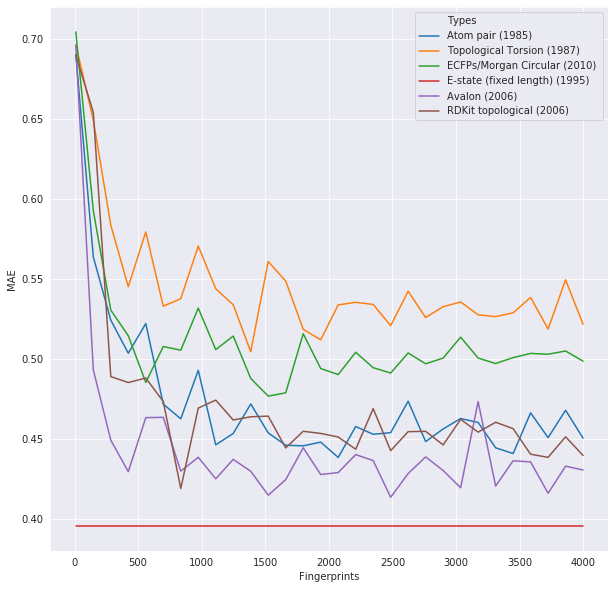

In [18]:
plotter['Fingerprints'] = x_list
plotter['MAE'] = y_list
plotter['Types'] = fingerprint
sns.set_style("darkgrid")
plt.figure(figsize=(10, 10))
ax = sns.lineplot(data=plotter,x='Fingerprints',y='MAE',hue='Types')
#ax.lines[0].set_linestyle("--")
plt.show()

In [85]:
import pickle

results = pickle.load(open( "data/test_all_results3.pkl", "rb" ))
best = pickle.load( open( "data/test_all_best3.pkl", "rb" ) )
fin = pickle.load( open( "data/test_all_fin3.pkl", "rb" ) )

In [102]:
feature_method_list = []
metric_list = []
value_list = []

for target in results.keys():
    for feature in results[target].keys():
        for metric in results[target][feature].keys():
            for value in results[target][feature][metric].keys():
                feature_method_list.append(feature)
                metric_list.append(value)
                value_list.append(results[target][feature][metric][value])
               

In [103]:
df = pd.DataFrame()
df['Feature'] = feature_method_list
df['Metric'] = metric_list
df['Value'] = value_list
df


,Feature,Metric,Value
0,Estate,RMSE,0.783612
1,Estate,R2,0.226593
2,Estate,R2_train,0.705846
3,Estate,rP,0.417823
4,Estate,rP_train,0.716654
...,...,...,...
135,LBoB + OB100,MAPE,11.941349
136,LBoB + OB100,MAE,0.423215
137,LBoB + OB100,MAE_std,0.000000
138,LBoB + OB100,MAE_train,0.237259


In [109]:
table = pd.pivot_table(df, values=['Value'], index=['Feature'],columns=['Metric'])
table = table.sort_values(by=[('Value','MAE')])
table

Value                                  \
Metric                              MAE MAE_std MAE_std_train MAE_train   
Feature                                                                   
SoB                            0.320831     0.0           0.0  0.294813   
C.D.S + LBoB                   0.325959     0.0           0.0  0.269448   
\footnotesize{Estate+CDS+SoB}  0.330977     0.0           0.0  0.263551   
Estate+CDS                     0.416653     0.0           0.0  0.324903   
LBoB + OB100                   0.423215     0.0           0.0  0.237259   
Oxygen balance atom counts     0.431188     0.0           0.0  0.430170   
Bag of Bonds                   0.452194     0.0           0.0  0.224383   
CDS                            0.460594     0.0           0.0  0.397277   
Oxygen balance$_{100}$         0.482648     0.0           0.0  0.449744   
Summed Bag of Bonds (sBoB)     0.531424     0.0           0.0  0.416916   
Oxygen balance$_{1600}$        0.539568     0.0           0.0  0.421707   
Estate                         0.569689     0.0           0.0  0.381873   
CM eigs                        0.635466     0.0           0.0  0.279809   
Coulomb matrices as vec        0.763203     0.0           0.0  0.357869   

                                                                        \
Metric                              MAPE        R2  R2_train      RMSE   
Feature                                                                  
SoB                             8.104847  0.687035  0.828295  0.439107   
C.D.S + LBoB                    9.426452  0.846260  0.839088  0.386979   
\footnotesize{Estate+CDS+SoB}  10.891514  0.784278  0.848635  0.408936   
Estate+CDS                     10.161944  0.657990  0.780774  0.537306   
LBoB + OB100                   11.941349  0.773710  0.866287  0.535332   
Oxygen balance atom counts     11.148884  0.350060  0.694579  0.550098   
Bag of Bonds                   16.192097  0.707894  0.892190  0.573748   
CDS                            10.424326  0.198068  0.697852  0.655594   
Oxygen balance$_{100}$         13.989611  0.610004  0.580323  0.577569   
Summed Bag of Bonds (sBoB)     16.994625  0.567913  0.661153  0.640318   
Oxygen balance$_{1600}$        12.959616  0.360144  0.666648  0.673711   
Estate                         15.527671  0.226593  0.705846  0.783612   
CM eigs                        19.289552  0.197686  0.845328  0.779658   
Coulomb matrices as vec        33.238017  0.006804  0.671077  1.041351   

                                                   
Metric                               rP  rP_train  
Feature                                            
SoB                            0.721658  0.834827  
C.D.S + LBoB                   0.889856  0.843852  
\footnotesize{Estate+CDS+SoB}  0.842797  0.854145  
Estate+CDS                     0.738996  0.788104  
LBoB + OB100                   0.792945  0.867831  
Oxygen balance atom counts     0.552967  0.694626  
Bag of Bonds                   0.717616  0.902220  
CDS                            0.211436  0.706994  
Oxygen balance$_{100}$         0.682536  0.581127  
Summed Bag of Bonds (sBoB)     0.621529  0.686634  
Oxygen balance$_{1600}$        0.399002  0.687613  
Estate                         0.417823  0.716654  
CM eigs                        0.242736  0.852765  
Coulomb matrices as vec        0.057256  0.747130

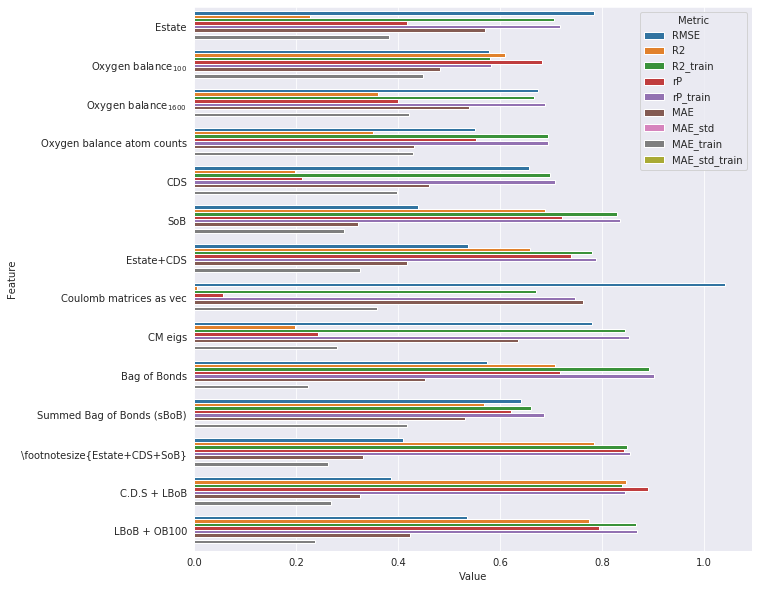

In [116]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 10))
ax = sns.barplot(data=df.drop(df.index[df['Metric'] == 'MAPE'], inplace = False),y='Feature',x='Value',hue='Metric')
#ax.lines[0].set_linestyle("--")
plt.show()